# OneHealth Data Analysis

In [1]:
# Importing dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile # for dealing with zip files
from datetime import timedelta # for dealing with time series calculations
from statsmodels.tsa.seasonal import seasonal_decompose # import statsmodel time series decomposer



import warnings
warnings.filterwarnings("ignore")

In [2]:
# import the cleaned data

df = pd.read_excel("Assessment_Data_Output.xlsx")

In [3]:
# Check the column names

df.columns

Index(['hmo_id', 'prescription_code', 'name', 'date_created', 'status',
       'delivery_status', 'delivery_time', 'lead_time'],
      dtype='object')

In [4]:
# check data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5337 entries, 0 to 5336
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   hmo_id             5337 non-null   object        
 1   prescription_code  5337 non-null   object        
 2   name               5337 non-null   object        
 3   date_created       5337 non-null   datetime64[ns]
 4   status             5337 non-null   object        
 5   delivery_status    5337 non-null   object        
 6   delivery_time      5337 non-null   datetime64[ns]
 7   lead_time          5337 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(5)
memory usage: 333.7+ KB


In [5]:
# check the first 5 row for a preview


df.head()

hmo_id prescription_code        name        date_created     status  \
0  10136AVLC          294E6A17       Ijete 2024-05-01 06:29:03  Dispensed   
1  10054PVLA          850258F2   Abdullahi 2024-05-01 06:56:48  Dispensed   
2  10506OPAA          175FBA94  FAGBAMIGBE 2024-05-01 06:57:10  Dispensed   
3  10023EVGA          B8D45EBC        Ovie 2024-05-01 06:57:55  Dispensed   
4  10059OPBA          392A2E5B    Ogundare 2024-05-01 07:06:16  Dispensed   

  delivery_status       delivery_time  lead_time  
0       Delivered 2024-05-01 13:23:00   6.899167  
1       Delivered 2024-05-01 12:00:00   5.053333  
2       Delivered 2024-05-01 14:23:00   7.430556  
3       Delivered 2024-05-01 13:27:00   6.484722  
4       Delivered 2024-05-01 14:34:00   7.462222

In [6]:
# print the rows and colums

print(f"The total number of columns is: {df.shape[1]}")
print(f"The total number of rows is: {df.shape[0]}")

The total number of columns is: 8
The total number of rows is: 5337


In [7]:
# Sumarry statistics

df.describe(include='all')

hmo_id prescription_code      name                   date_created  \
count        5337              5337      5337                           5337   
unique       4699              5328      3502                            NaN   
top     10684MEXA          79CFEB1D  Emmanuel                            NaN   
freq            6                 2        24                            NaN   
mean          NaN               NaN       NaN  2024-05-17 04:26:23.273187328   
min           NaN               NaN       NaN            2024-05-01 06:29:03   
25%           NaN               NaN       NaN            2024-05-09 13:42:22   
50%           NaN               NaN       NaN            2024-05-16 22:15:18   
75%           NaN               NaN       NaN            2024-05-24 14:02:22   
max           NaN               NaN       NaN            2024-05-31 23:43:52   
std           NaN               NaN       NaN                            NaN   

           status delivery_status                  delivery_time    lead_time  
count        5337            5337                           5337  5337.000000  
unique          1               1                            NaN          NaN  
top     Dispensed       Delivered                            NaN          NaN  
freq         5337            5337                            NaN          NaN  
mean          NaN             NaN  2024-05-17 13:28:20.224845568     4.434265  
min           NaN             NaN            2024-05-01 11:00:00     0.000000  
25%           NaN             NaN            2024-05-09 17:40:00     3.058611  
50%           NaN             NaN            2024-05-17 11:35:00     4.082500  
75%           NaN             NaN            2024-05-24 17:34:00     5.566667  
max           NaN             NaN            2024-06-01 16:50:00    10.248611  
std           NaN             NaN                            NaN     1.838712

**Observation**
- Data appears to be clean

**Distribution plots**


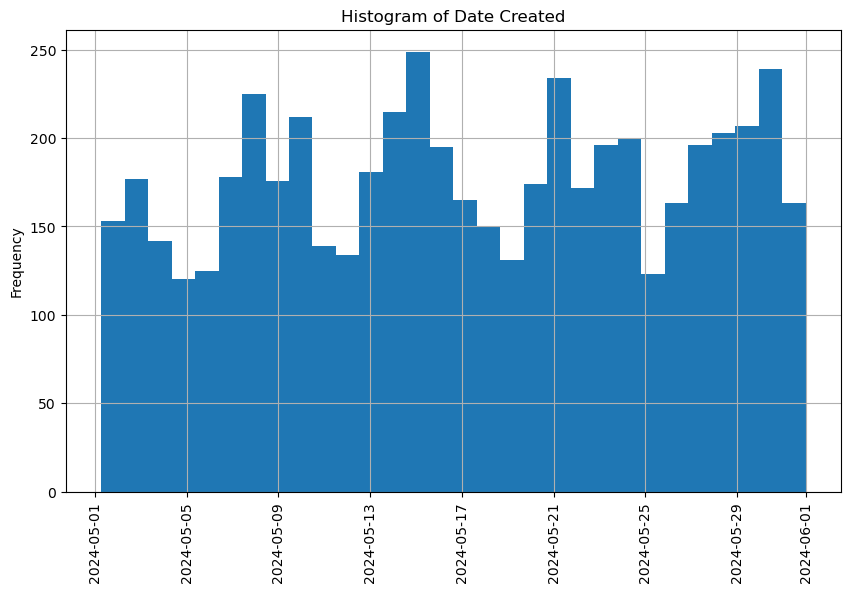

In [8]:
# Plot histogram for date_created
plt.figure(figsize=(10, 6))
df['date_created'].hist(bins=30)
plt.ylabel('Frequency')
plt.title('Histogram of Date Created')
plt.xticks(rotation = 90)
plt.show()

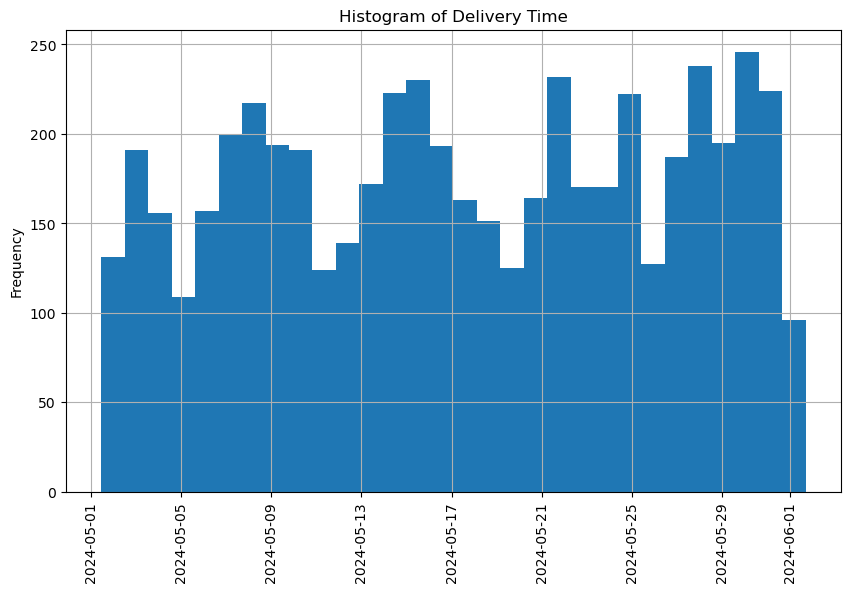

In [9]:
# Plot histogram for delivery_time
plt.figure(figsize=(10, 6))
df['delivery_time'].hist(bins=30)
plt.ylabel('Frequency')
plt.title('Histogram of Delivery Time')
plt.xticks(rotation = 90)
plt.show()

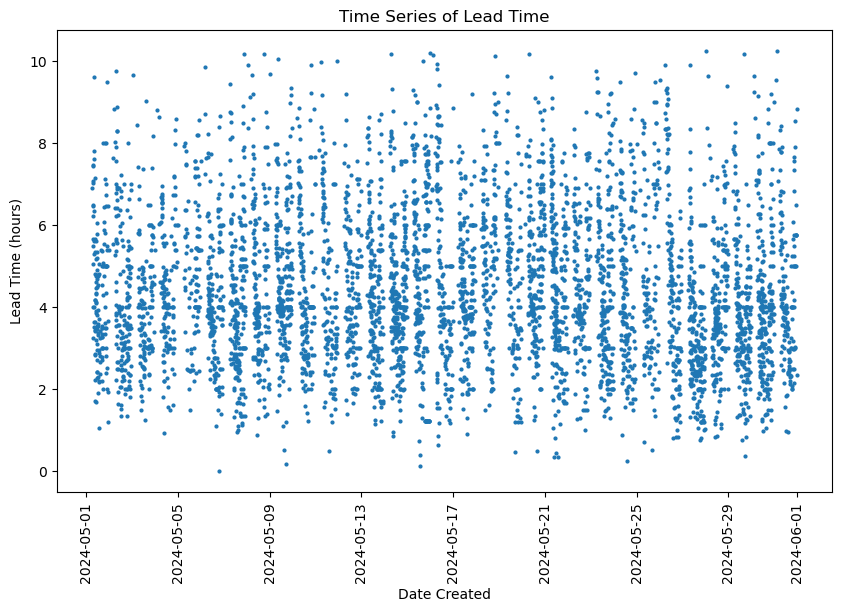

In [10]:
# Time series plot of lead_time
plt.figure(figsize=(10, 6))
plt.plot(df['date_created'], df['lead_time'], 'o', markersize=2)
plt.xlabel('Date Created')
plt.ylabel('Lead Time (hours)')
plt.title('Time Series of Lead Time')
plt.xticks(rotation = 90)
plt.show()

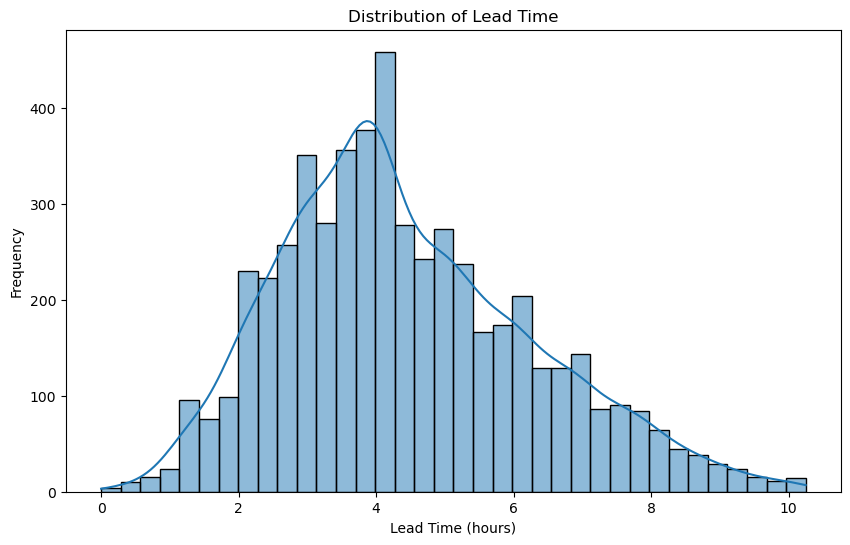

In [11]:
# Plot histogram with KDE for lead_time
plt.figure(figsize=(10, 6))
sns.histplot(df['lead_time'], kde=True)
plt.xlabel('Lead Time (hours)')
plt.ylabel('Frequency')
plt.title('Distribution of Lead Time')
plt.show()

**Observations:**

The time histograms and the series plot of lead_time against date_created shows how the lead time (in hours) varies over the period during which the records were created. Here’s a detailed analysis of the plot:

- Overall Trend: There seems to be a relatively stable range for lead times, mostly between 0 and around 10 hours, across the entire time span.

- Clusters: The data points are fairly evenly distributed over the date range, indicating a consistent recording of lead times.

- Outliers: There are no obvious extreme outliers in the plot. The values stay within a reasonable range, confirming the data's integrity after removing negative lead times and other anomalies.

- Density: Some dates might have higher densities of points (more records created), indicating busy days, but this is not extremely pronounced.

**Interpretation:**
- Consistency: The lead times are consistent over the dates, showing no significant trends or changes over time. This suggests that the process or system producing these records is stable.

- No Sudden Changes: There are no abrupt changes or patterns in lead time, which could indicate issues or improvements in the delivery process.

In [12]:
# Drop the status and delivery_status colums for our trend analysis

df_trend = df.drop(['status', 'delivery_status'], axis=1)

# Trend Analysis

**Delivery Time and Lead Time Trends**

In [13]:
# Repeat the analysis for delivery_time
# copy the data frame for deliverytime trend analysis
df_trend_delivery = df_trend.copy()
df_trend_delivery = df_trend_delivery.set_index('delivery_time')

In [14]:
df_trend_delivery.head()

hmo_id prescription_code        name  \
delivery_time                                                  
2024-05-01 13:23:00  10136AVLC          294E6A17       Ijete   
2024-05-01 12:00:00  10054PVLA          850258F2   Abdullahi   
2024-05-01 14:23:00  10506OPAA          175FBA94  FAGBAMIGBE   
2024-05-01 13:27:00  10023EVGA          B8D45EBC        Ovie   
2024-05-01 14:34:00  10059OPBA          392A2E5B    Ogundare   

                           date_created  lead_time  
delivery_time                                       
2024-05-01 13:23:00 2024-05-01 06:29:03   6.899167  
2024-05-01 12:00:00 2024-05-01 06:56:48   5.053333  
2024-05-01 14:23:00 2024-05-01 06:57:10   7.430556  
2024-05-01 13:27:00 2024-05-01 06:57:55   6.484722  
2024-05-01 14:34:00 2024-05-01 07:06:16   7.462222

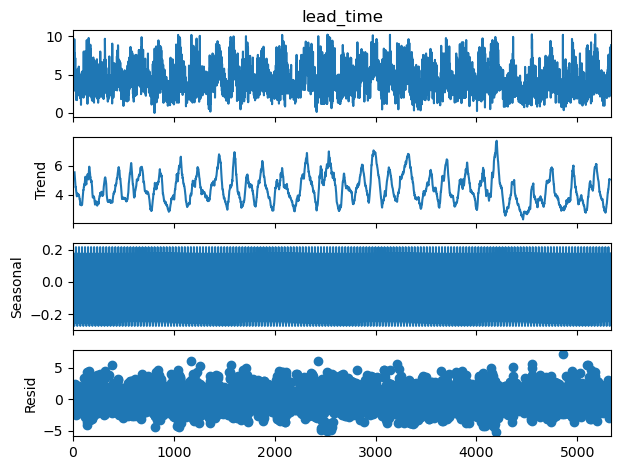

In [15]:
# Time Series Decomposition for delivery_time
df_delivery_time = df_trend['lead_time'].dropna()
decomposition = seasonal_decompose(df_delivery_time, model='additive', period=30)
decomposition.plot()
plt.show()

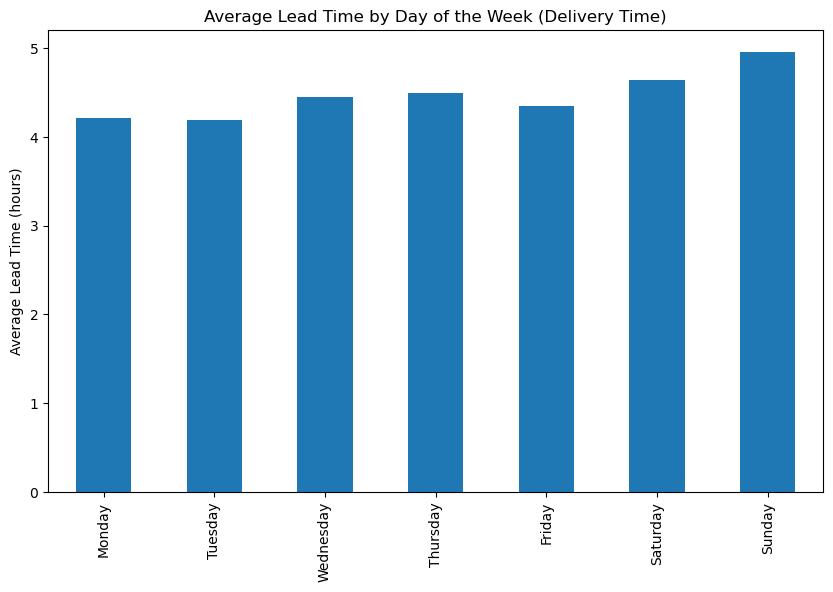

In [16]:
# Extract the day of the week
df_trend_delivery['day_of_week'] = df_trend_delivery.index.day_name()

# Calculate the mean delivery time by day of the week
mean_delivery_time_by_day = df_trend_delivery.groupby('day_of_week')['lead_time'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot the results
plt.figure(figsize=(10, 6))
mean_delivery_time_by_day.plot(kind='bar')
plt.title('Average Lead Time by Day of the Week (Delivery Time)')
plt.xlabel('')  # Remove the xlabel as the days of the week are already on the x-axis
plt.ylabel('Average Lead Time (hours)')
plt.show()

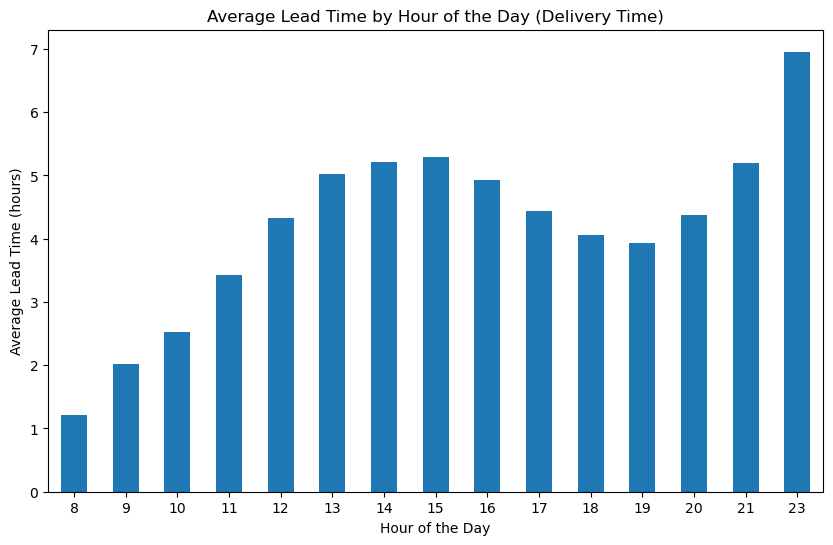

In [17]:
# Analyze by Hour of the Day for delivery_time
# Extract the hour of the day
df_trend_delivery['hour_of_day'] = df_trend_delivery.index.hour

# Calculate the mean delivery time by hour of the day
mean_delivery_time_by_hour = df_trend_delivery.groupby('hour_of_day')['lead_time'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
mean_delivery_time_by_hour.plot(kind='bar')
plt.title('Average Lead Time by Hour of the Day (Delivery Time)')
plt.xlabel('Hour of the Day')
plt.xticks(rotation = 0)  # Ensure all hours are shown
plt.ylabel('Average Lead Time (hours)')
plt.show()


### Observations

1. **Average Lead Time by Hour of the Day (Delivery Time):**
   - Lead times are shortest in the early morning hours (8 AM) and gradually increase, peaking around the afternoon (14-16 hours).
   - There's a noticeable drop after the peak, followed by another rise in the late evening (23 hours).
   - This indicates a potential bottleneck during the middle of the day.

2. **Average Lead Time by Day of the Week (Delivery Time):**
   - Lead times are relatively consistent across weekdays, with a slight increase on weekends.
   - Sunday has the highest average lead time, suggesting that weekend deliveries are slower.

3. **Lead Time Decomposition:**
   - The trend component shows periodic fluctuations, indicating a cyclical pattern in lead times.
   - The seasonal component appears to be constant, suggesting minimal impact from seasonal variations.
   - The residual component shows random noise, implying that other factors might be influencing lead times unpredictably.

### Recommendations

1. **Optimize Mid-Day Operations:**
   - Since lead times peak during the afternoon, consider investigating the processes and workloads during these hours.
   - Introduce additional resources or shift schedules to handle the increased load during peak hours.
   - Implement more efficient batching or prioritization methods to manage orders effectively.

2. **Improve Weekend Delivery Performance:**
   - Since lead times are higher on weekends, especially Sundays, analyze the factors contributing to this delay.
   - Ensure adequate staffing and resources are available during weekends.
   - Consider partnering with third-party logistics providers to handle overflow during weekends.

3. **Enhance Early Morning and Late Evening Operations:**
   - The early morning and late evening hours show shorter lead times, which can be leveraged.
   - Promote early or late delivery options to customers, potentially offering discounts or incentives for choosing these time slots.
   - Utilize the shorter lead times during these periods to offset peak times.

4. **Continuous Monitoring and Adjustment:**
   - Regularly monitor lead time trends to identify any emerging patterns or issues.
   - Use real-time data analytics to dynamically adjust operations based on current workloads and lead times.
   - Implement a feedback loop for continuous improvement, involving frontline staff to suggest and test operational changes.

5. **Address Random Variations:**
   - Investigate the factors contributing to the residual noise in the lead time decomposition.
   - Identify and mitigate any irregular or unpredictable elements impacting lead times, such as equipment failures, traffic delays, or unexpected surges in order volume.

By addressing these observations and implementing the recommendations, you can improve the overall efficiency and reliability of your delivery operations, leading to better SLA compliance and customer satisfaction.

# Performance Metrics:


In [18]:
# Calculate average delivery time (in hours)
average_delivery_time = (df['delivery_time'] - df['date_created']).dt.total_seconds().mean() / 3600
print(f"Average Delivery Time: {average_delivery_time:.2f} hours")

# Calculate average lead time ('lead_time' column is already in hours)
average_lead_time = df['lead_time'].mean()
print(f"Average Lead Time: {average_lead_time:.2f} hours")

Average Delivery Time: 9.03 hours
Average Lead Time: 4.43 hours


**Determining On-time vs Late Deliveries**

To determine whether a delivery is on time or late, we need a threshold. Let's assume a delivery is considered "on time" if it is completed within a certain number of hours after the date_created. You should define what constitutes "on time" based on your business rules.

Let's assume "on time" means delivery within 4 hours

In [19]:
# Define the threshold for on-time delivery in hours
on_time_threshold = 4

# Calculate the delivery times in hours
df['delivery_duration'] = (df['delivery_time'] - df['date_created']).dt.total_seconds() / 3600

# Determine if each delivery is on time
df['on_time'] = df['delivery_duration'] <= on_time_threshold

# Calculate the proportion of on-time deliveries
on_time_proportion = df['on_time'].mean()
late_proportion = 1 - on_time_proportion

print(f"Proportion of On-time Deliveries: {on_time_proportion:.2%}")
print(f"Proportion of Late Deliveries: {late_proportion:.2%}")

Proportion of On-time Deliveries: 30.19%
Proportion of Late Deliveries: 69.81%


# SLA Compliance Analysis:

### Firstly: Calculate SLA Compliance

First, we need to calculate whether each prescription meets the SLA criteria.

Create a column to determine if the prescription was created before or after 3 PM.
Determine if the prescription was delivered the same day or by 12 PM the next day.
Combine these conditions to create an sla_compliant column.
Here is the code for these calculations:

In [20]:
df_sla = df.copy()

In [21]:
# Ensure the date_created and delivery_time columns are datetime objects
df_sla['date_created'] = pd.to_datetime(df_sla['date_created'])
df_sla['delivery_time'] = pd.to_datetime(df_sla['delivery_time'])

# Calculate SLA Compliance
time_3pm = pd.Timestamp('15:00:00').time()
time_12pm_next_day = pd.Timestamp('12:00:00').time()

# Check if created before or after 3 PM
df_sla['created_before_3pm'] = df_sla['date_created'].dt.time <= time_3pm

# Check if same day delivery
df_sla['same_day_delivery'] = (df_sla['date_created'].dt.date == df_sla['delivery_time'].dt.date)

# Check if next day delivery by 12 PM
df_sla['next_day_delivery'] = (
    (df_sla['date_created'].dt.time > time_3pm) &
    ((df_sla['delivery_time'].dt.date == df_sla['date_created'].dt.date + pd.Timedelta(days=1)) &
     (df_sla['delivery_time'].dt.time <= time_12pm_next_day))
)

# Combine the conditions to define SLA compliance
df_sla['sla_compliant'] = df_sla['created_before_3pm'] & df_sla['same_day_delivery'] | (~df_sla['created_before_3pm'] & df_sla['next_day_delivery'])

# Display to ensure the column was created correctly
df_sla[['date_created', 'delivery_time', 'created_before_3pm', 'same_day_delivery', 'next_day_delivery', 'sla_compliant']].head()

date_created       delivery_time  created_before_3pm  \
0 2024-05-01 06:29:03 2024-05-01 13:23:00                True   
1 2024-05-01 06:56:48 2024-05-01 12:00:00                True   
2 2024-05-01 06:57:10 2024-05-01 14:23:00                True   
3 2024-05-01 06:57:55 2024-05-01 13:27:00                True   
4 2024-05-01 07:06:16 2024-05-01 14:34:00                True   

   same_day_delivery  next_day_delivery  sla_compliant  
0               True              False           True  
1               True              False           True  
2               True              False           True  
3               True              False           True  
4               True              False           True

### 1. Analyze and Trend the Average Turnaround Time per Order

**Turnaround Time Calculation:**

Turnaround time is the total time taken from order creation to delivery.

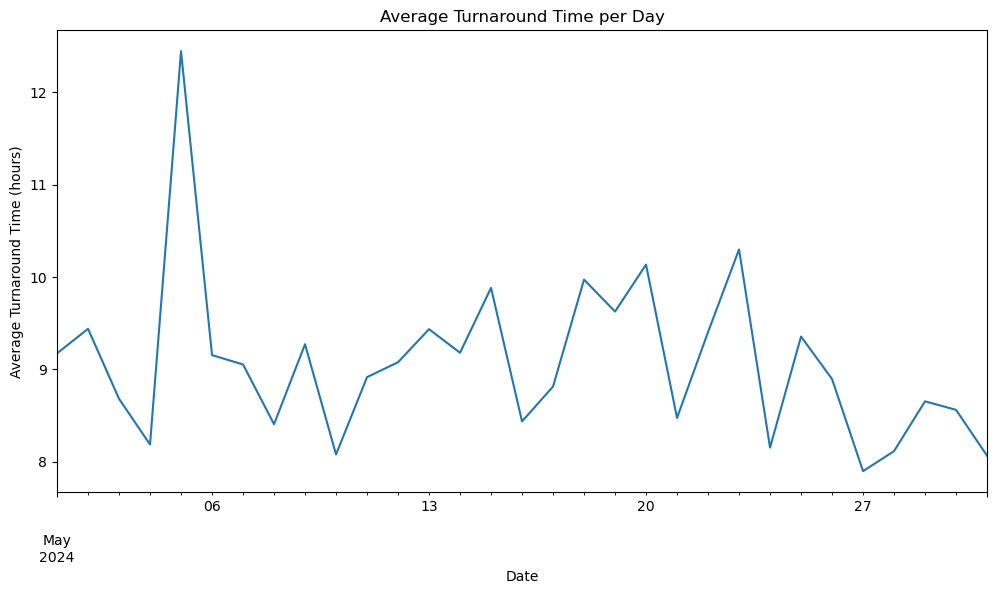

In [22]:
# Calculate Turnaround Time
df_sla['turnaround_time'] = (df_sla['delivery_time'] - df_sla['date_created']).dt.total_seconds() / 3600  # Convert to hours

# Trend Average Turnaround Time per Day
turnaround_time_trend = df_sla.resample('D', on='date_created')['turnaround_time'].mean()

plt.figure(figsize=(12, 6))
turnaround_time_trend.plot()
plt.title('Average Turnaround Time per Day')
plt.xlabel('Date')
plt.ylabel('Average Turnaround Time (hours)')
plt.show()

### 2. Analyze SLA Achievement Trends per Day

**Daily SLA Compliance Calculation:**

Calculate the daily SLA compliance rate.

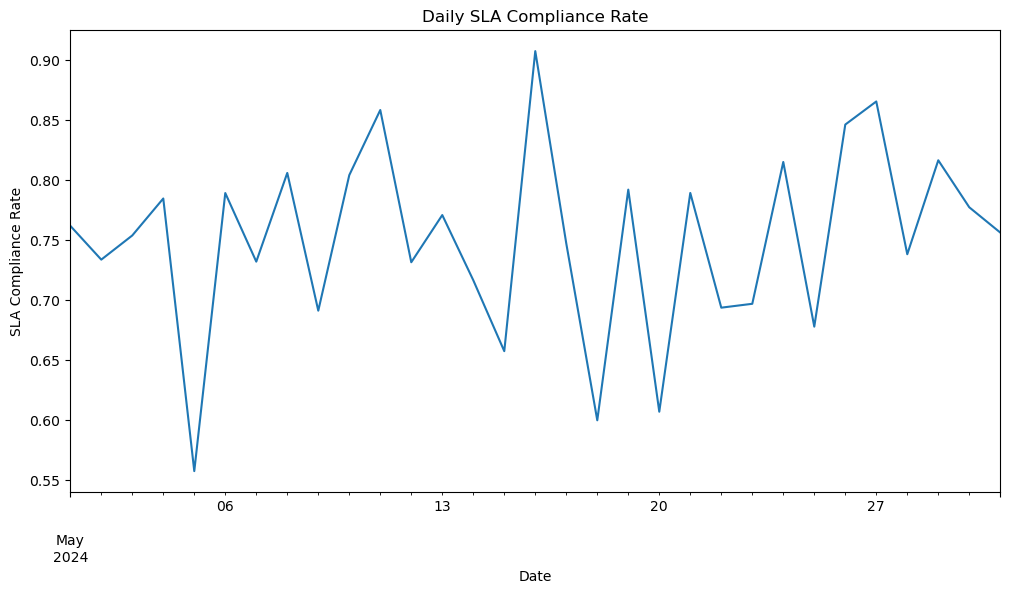

In [23]:
# Set the date_created as the index for resampling
df_sla_reindexed = df_sla.set_index('date_created')

# Analyze SLA Achievement Trends per Day
daily_sla_compliance = df_sla_reindexed.resample('D')['sla_compliant'].mean()

plt.figure(figsize=(12, 6))
daily_sla_compliance.plot()
plt.title('Daily SLA Compliance Rate')
plt.xlabel('Date')
plt.ylabel('SLA Compliance Rate')
plt.show()

### 3. Analyze/Trend the Average SLA Achievement of Orders Sent per Hour per Day

**Hourly SLA Compliance Calculation:**

Calculate the SLA compliance rate for each hour of the day.

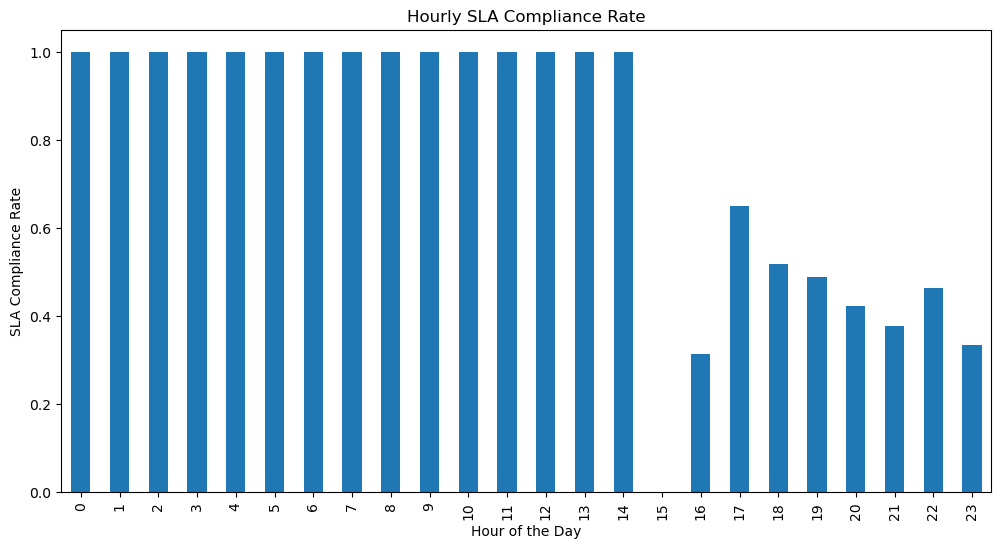

In [24]:
# Analyze/Trend the Average SLA Achievement of Orders Sent per Hour per Day
df_sla_reindexed['hour'] = df_sla_reindexed.index.hour
hourly_sla_compliance = df_sla_reindexed.groupby('hour')['sla_compliant'].mean()

plt.figure(figsize=(12, 6))
hourly_sla_compliance.plot(kind='bar')
plt.title('Hourly SLA Compliance Rate')
plt.xlabel('Hour of the Day')
plt.ylabel('SLA Compliance Rate')
plt.show()

### 4. Compare and Trend Actual Lead Times Against the Target Lead Time of Four Hours

**Lead Time Comparison:**

Plot actual lead times and highlight the target lead time of four hours.

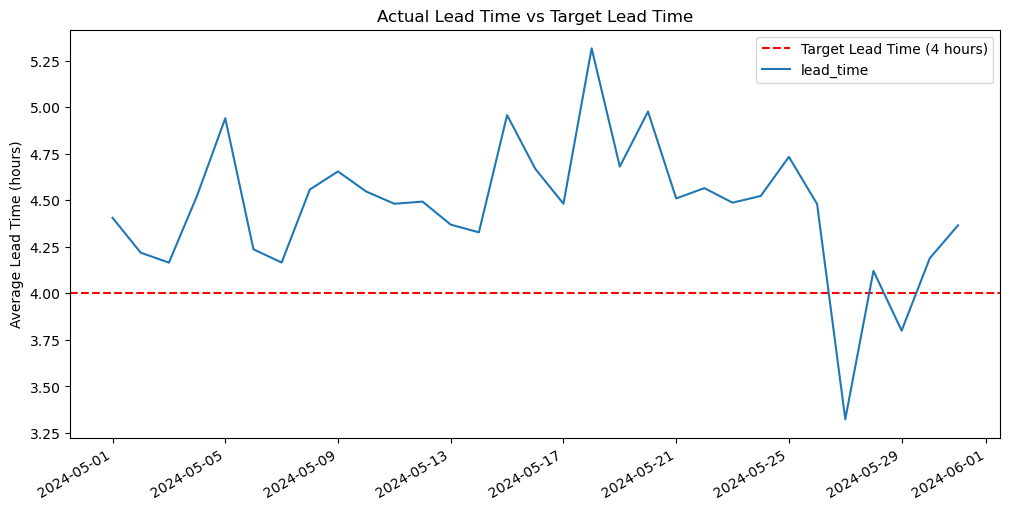

In [25]:
# Compare and Trend Actual Lead Times Against the Target Lead Time of Four Hours
plt.figure(figsize=(12, 6))
plt.axhline(y=4, color='r', linestyle='--', label='Target Lead Time (4 hours)')
df_sla_reindexed.resample('D')['lead_time'].mean().plot()
plt.title('Actual Lead Time vs Target Lead Time')
plt.xlabel('')
plt.ylabel('Average Lead Time (hours)')
plt.legend()
plt.show()

### 5. Assess and Trend Compliance with the SLA

**SLA Compliance Trends:**

Assess and trend compliance with the SLA by comparing created and delivered times as specified.

In [26]:
# Assess and Trend Compliance with the SLA

# Resample to daily compliance rate
daily_sla_compliance = df_sla.resample('D', on='date_created')['sla_compliant'].mean()
daily_sla_compliance.head()

date_created
2024-05-01    0.761905
2024-05-02    0.733728
2024-05-03    0.753846
2024-05-04    0.784615
2024-05-05    0.557692
Freq: D, Name: sla_compliant, dtype: float64

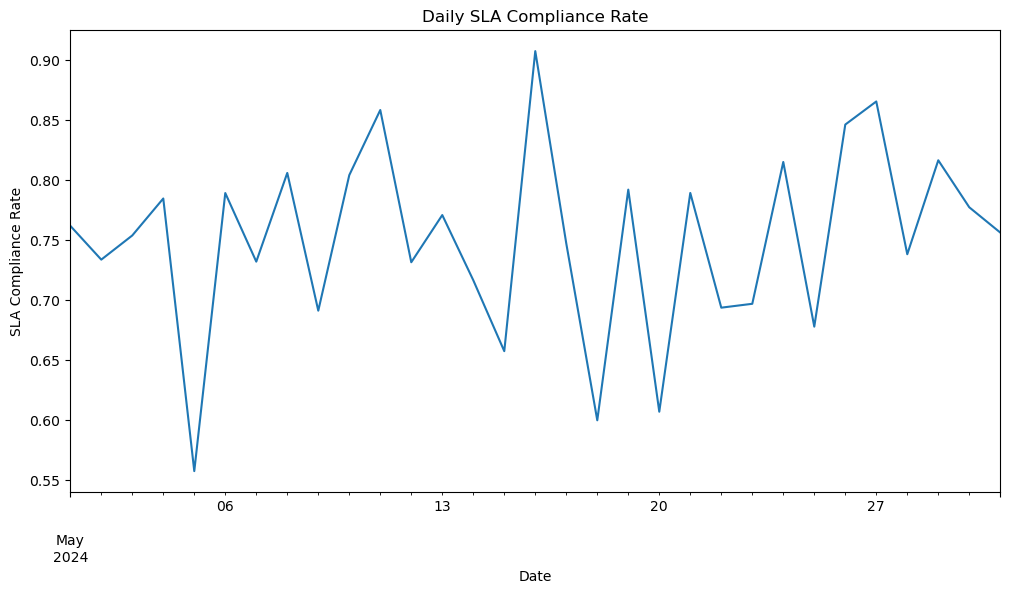

In [27]:
plt.figure(figsize=(12, 6))
daily_sla_compliance.plot()
plt.title('Daily SLA Compliance Rate')
plt.xlabel('Date')
plt.ylabel('SLA Compliance Rate')
plt.show()

### Observations

#### 1. **Actual Lead Time vs Target Lead Time**
- **Average Lead Time**: The lead time fluctuates significantly throughout the month, ranging between approximately 3.75 and 5.25 hours.
- **Target Lead Time**: The target lead time is consistently set at 4 hours.
- **Compliance Issues**: The actual lead time frequently exceeds the target lead time of 4 hours, indicating that processes are not meeting the target consistently.

#### 2. **Hourly SLA Compliance Rate**
- **High Compliance Hours**: SLA compliance is at 100% from 00:00 to 14:00 hours.
- **Low Compliance Hours**: From 15:00 hours onward, there is a significant drop in compliance rates, especially between 15:00 and 23:00 hours, where compliance ranges from 0% to around 60%.

#### 3. **Daily SLA Compliance Rate**
- **Variability**: The daily SLA compliance rate shows significant variability, ranging from around 55% to 90%.
- **Trends**: There are no clear trends indicating consistent improvement or deterioration over the course of the month, suggesting erratic performance.

### Recommendations

1. **Analyze and Address Lead Time Variability**
   - **Root Cause Analysis**: Investigate the causes of lead time fluctuations, especially why the lead time often exceeds the 4-hour target. Key factors to examine include process bottlenecks, resource constraints, and peak demand periods.
   - **Process Improvement**: Implement process improvements, such as streamlining workflows or adding resources during peak times to ensure that lead times consistently meet the 4-hour target.

2. **Improve Afternoon and Evening SLA Compliance**
   - **Resource Allocation**: Reallocate or increase resources during the afternoon and evening hours when compliance rates are low. This may include staffing adjustments, shift changes, or improved task prioritization.
   - **Training and Monitoring**: Provide additional training for staff working during low compliance hours and establish monitoring mechanisms to quickly identify and address issues as they arise.

3. **Stabilize Daily SLA Compliance**
   - **Consistency Measures**: Implement measures to stabilize daily SLA compliance, such as setting up daily review meetings to identify compliance issues and track performance metrics.
   - **Continuous Improvement**: Adopt a continuous improvement approach to address daily performance variability. This could involve regular feedback loops, performance tracking, and incremental changes to operational procedures.

4. **Implement Predictive Monitoring**
   - **Predictive Analysis**: Use predictive analytics to anticipate periods of low compliance and high lead time, allowing for proactive adjustments to be made in advance.
   - **Automated Alerts**: Set up automated alerts for when lead times exceed thresholds or SLA compliance falls below acceptable levels, ensuring timely responses to emerging issues.

By addressing these areas, it is expected that lead times can be reduced to consistently meet the 4-hour target, and SLA compliance can be improved across all hours of operation.